In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


     -------------------------------------- 10.6/10.6 MB 283.7 kB/s eta 0:00:00
     -------------------------------------- 14.7/14.7 MB 285.1 kB/s eta 0:00:00


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.2/7.2 MB 191.3 kB/s eta 0:00:00
     -------------------------------------- 55.3/55.3 KB 222.0 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 3.3/3.3 MB 196.3 kB/s eta 0:00:00
     ------------------------------------ 900.8/900.8 KB 154.5 kB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


<b>Visualizing the historical data </b>

In [265]:
df= pd.read_csv('internet_traffic_hist(1).csv') #reading the dataset
df.head()

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009


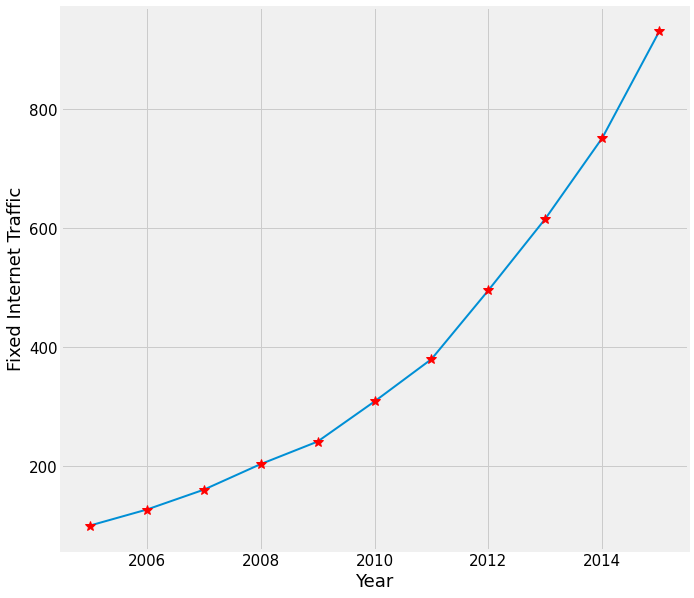

In [266]:
#ploting the year against traffic

plt.figure(figsize = (10,10))

x = df.year
y = df.traffic

plt.plot(x, y, linewidth = 2)
plt.plot(x, y, '*r', markersize = 10 )
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic')

plt.rcParams.update({'font.size': 15})
plt.show()

<b>Application of Simple Linear Regression: First Order Polynomial</b>

The slope of line = 79.52710966244514.
The y intercept = -159457.12265833947.
The best fit simple linear regression line = 79.52710966244514x + -159457.12265833947.


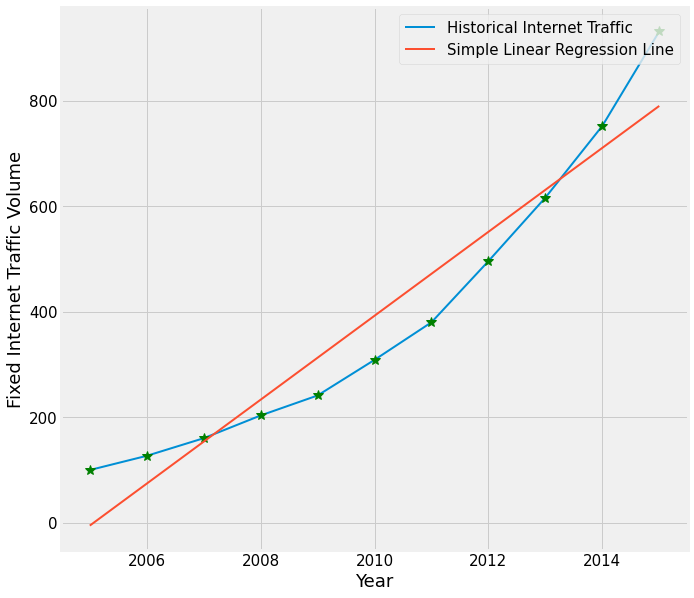

In [68]:
plt.figure(figsize = (10,10))

order = 1

x = df.year
y = df.traffic

n, d = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 2)
plt.plot(x, y,'*g', markersize = 10 )
plt.plot(x, n*x + d, label = 'Simple Linear Regression Line', linewidth = 2)

print ('The slope of line = {}.'.format(n))
print ('The y intercept = {}.'.format(d))
print ('The best fit simple linear regression line = {}x + {}.'.format(n,d))

plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper right')

plt.rcParams.update({'font.size': 15})
plt.show()

<b>Application of Linear Regression: Higher Order Polynomial</b>

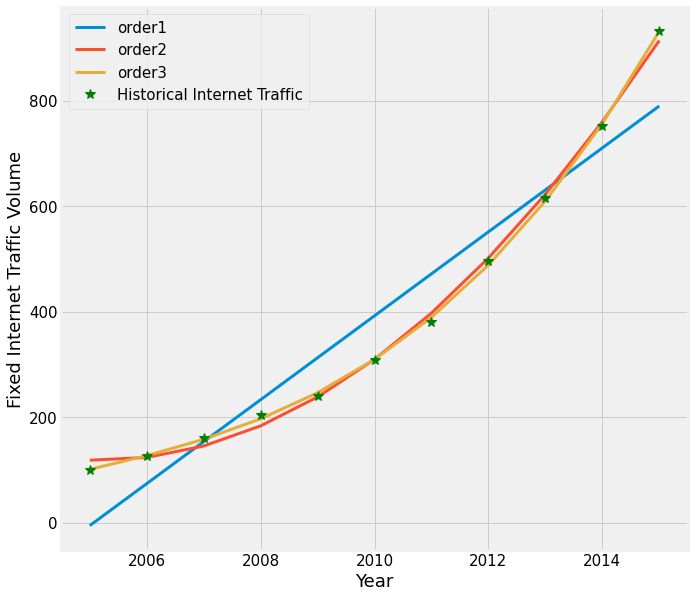

In [85]:
models = []

for order in range(1,5):
   
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (10,10))

for model in models[0:3]:
    plt.plot(x, model(x), label = 'order' + str(len(model)), linewidth = 3)

plt.plot(x, y, '*g', markersize = 10, label = 'Historical Internet Traffic', linewidth = 3)
plt.legend(loc = 'upper left')

plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.rcParams.update({'font.size': 15})

plt.show()

In [99]:
models = []       
errors_df = []  
mse_df = []

for order in range(1,4):

    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
    e = np.abs(y-p(x))        
    mse = np.sum(e**2)/len(df) 
    
    errors_df.append(e)   
    mse_df.append(mse) 
    


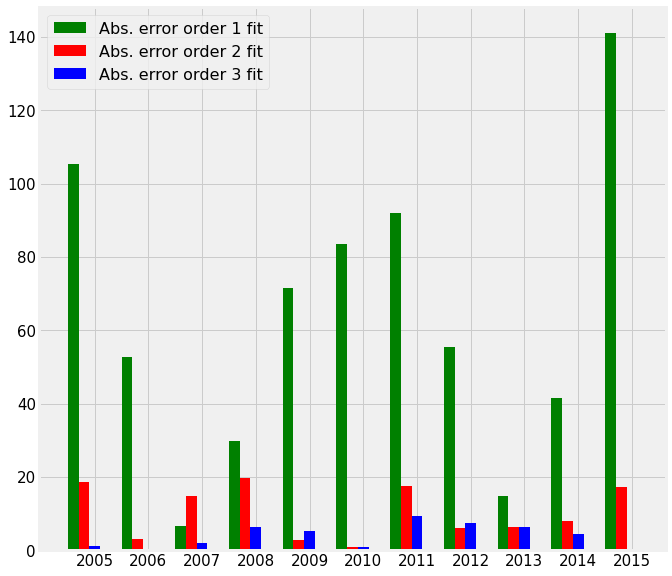

In [267]:
    x = df.year
width = 0.2   
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
p1 = ax.bar( x, errors_df[0], width, color = 'g', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_df[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_df[2], width, color = 'b', label = 'Abs. error order 3 fit')
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

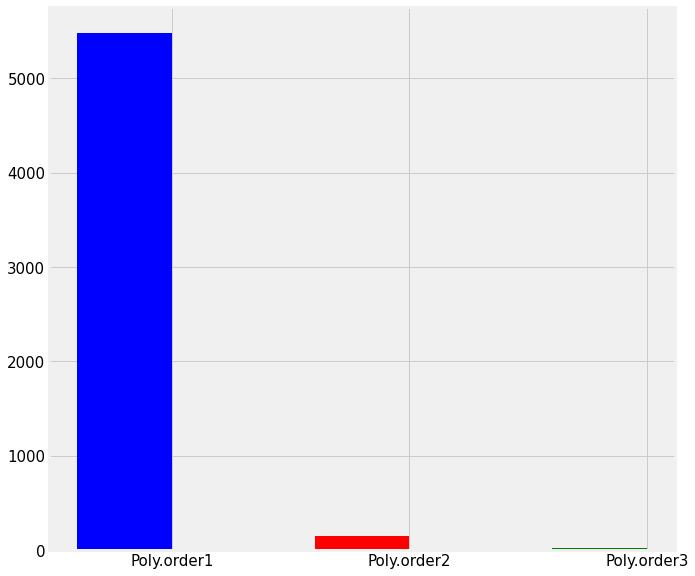

In [119]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2])
width = 0.4  
p1 = ax.bar( x[0], mse_df[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_df[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_df[2], width, color = 'g', label = 'pred. error order 3 fit')
ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly.order1', 'Poly.order2', 'Poly.order3'], rotation=0)
plt.show()


<b>The above plot shows that the third polynomial order has the least amount of errors, and the error between the first and second orders is negligible. This suggests that the third polynomial is the best fit for the orders used</b>

In [121]:
order = 3

x = df.year.values      # x being the regressor value
y = df.traffic.values   # y being the regressand value

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

p = np.poly1d(p_array)

print(type(p), p)

print('The value of the polynomial for x = 2020 is : {} '.format(p(2020)))

e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('The polynomial parameters estimated are: {}'.format(p))
print('The errors for each value of x, with polynomial parameters estimated are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

<class 'numpy.ndarray'> [ 4.83129399e-01 -2.90500575e+03  5.82252080e+06 -3.89005383e+09]
<class 'numpy.poly1d'>         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The value of the polynomial for x = 2020 is : 2328.578447818756 
The polynomial parameters estimated are:         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The errors for each value of x, with polynomial parameters estimated are: 
 [1.30743074 0.39125312 2.02722645 6.3298316  5.28394498 0.93069849
 9.41692403 7.34009986 6.27729509 4.48133981 0.16291568]
The MSE is :25.172186297832425


<b>Non-Linear Regression Model: Exponential Growth</b>

In [128]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     -------------------------------------- 37.0/37.0 MB 433.0 kB/s eta 0:00:00


In [129]:
from scipy.optimize import curve_fit

In [166]:
def my_exp_func(x, a, b):
    return a * (b ** x) 

x = np.arange(2016-2005)    
y = df.traffic.values  

p, cov = curve_fit(my_exp_func, x, y)
e = np.abs(y - my_exp_func(x, *p))
mse = np.sum(e**2)/len(df)

print('The exponential parameters estimated are: {}'.format(p))
print('The errors for each value of x, with exponential parameters estimated are: \n {}'.format(e))
print('The Mean Squared Error is :{}'.format(mse))

models.append(p)

errors_df.append(e) 
mse_df.append(mse)

The exponential parameters estimated are: [103.37820155   1.24678465]
The errors for each value of x, with exponential parameters estimated are: 
 [ 3.37820155  1.95659915  0.39475818  3.03416206  8.50876843  2.65664491
  8.32850918 11.70265938 12.59154088  0.47531783  7.10276483]
The Mean Squared Error is :47.23616366678746


<b>Comparing Models</b>

In [245]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached scikit_learn-1.0.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)


In [246]:
from sklearn.metrics import r2_score

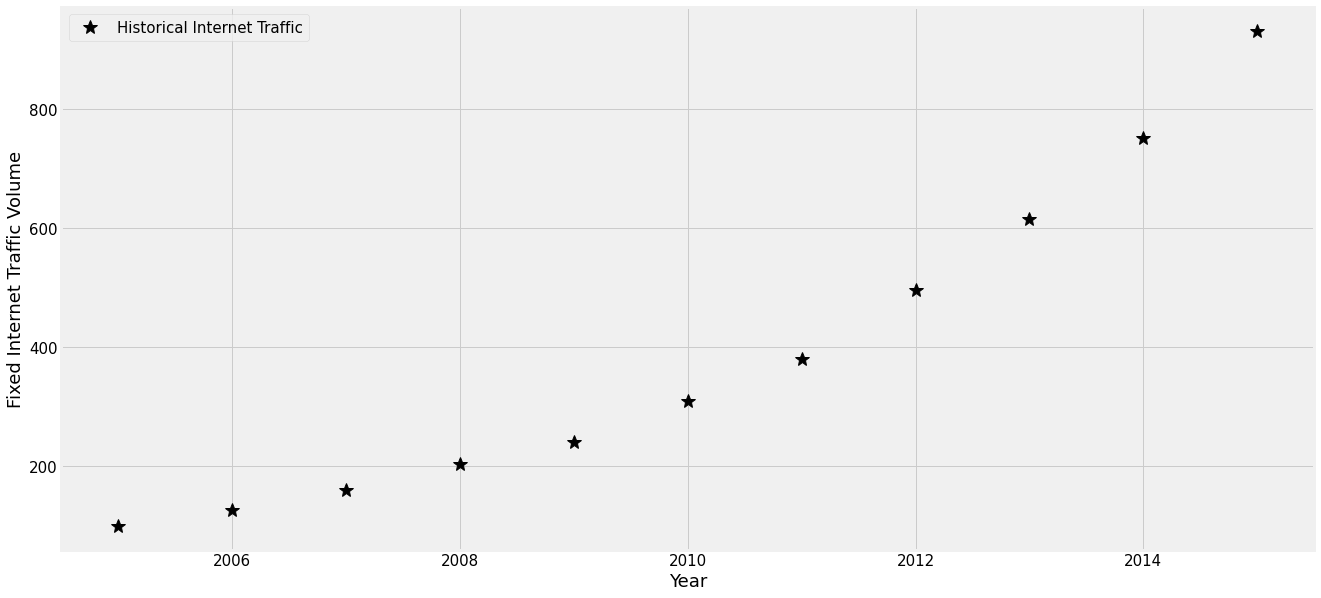

In [252]:
 plt.figure(figsize = (20,10))

for model in models[0:-1]:
    
    x = df.year.values      
    y = df.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)
x = np.arange(2016-2005)

plt.plot(df.year, df.traffic, '*k', markersize = 14, label='Historical Internet Traffic')
plt.legend(loc = 'upper left')
#axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.show()

Visualise fit error for each year

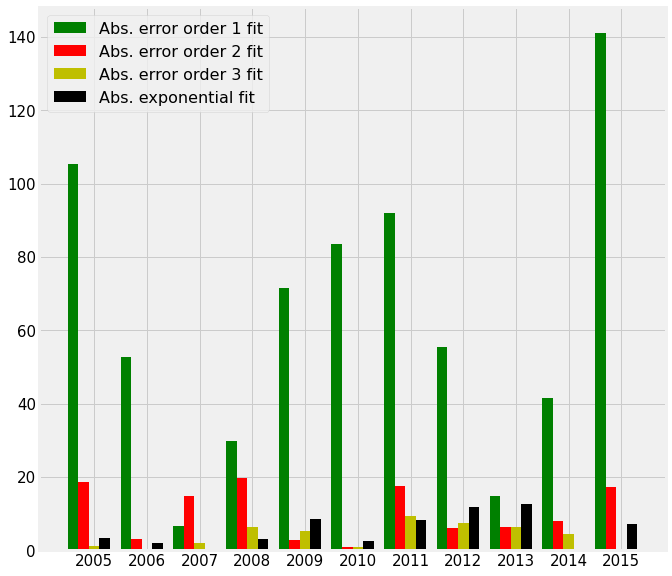

In [261]:
x = df.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_df[0], width, color = 'g', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_df[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_df[2], width, color = 'y', label = 'Abs. error order 3 fit')
p4 = ax.bar( x + 3*width, errors_df[3], width, color = 'k', label = 'Abs. exponential fit')

ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

Visualise Mean Squares Error (MSE) for each model

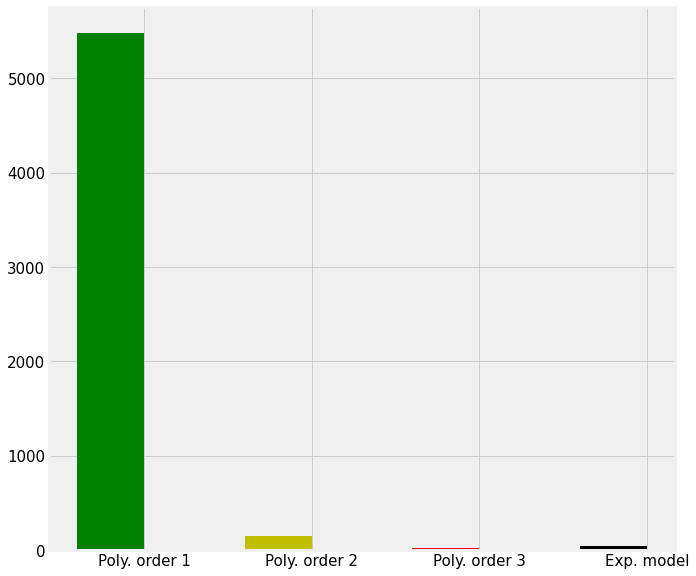

In [268]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = 0.4   #size of the bar

p1 = ax.bar( x[0], mse_df[0], width, color = 'g', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_df[1], width, color = 'y', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_df[2], width, color = 'r', label = 'pred. error order 3 fit')
p4 = ax.bar( x[3], mse_df[3], width, color = 'k', label = 'pred. exponential fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3', 'Exp. model' ], rotation=0)
plt.show()

<b>From the plot, the third order polynomial fits better the traffic measurements in the observed range</b>

<h> Visualizing for the future internet traffic</h>

In [271]:
df1= pd.read_csv('internet_traffic_histtwo.csv') #reading the dataset
df1.head()

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009


In [274]:
df2 = pd.concat([df, df1]).reset_index()
df2.drop('index', axis=1, inplace=True)
df2 = df.drop_duplicates() #removing dulpicates
df2.head(20)

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009
5,308.791823,2010
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014


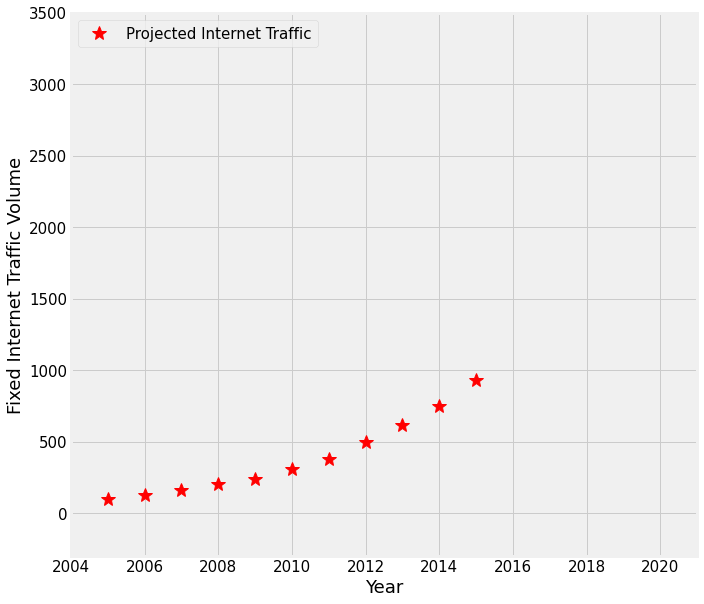

In [280]:
plt.figure(figsize = (10,10))

errors_all = []
mse_all = []

for model in models[0:-1]:
    
    # Visualize polynomial model fit
    x = df2.year.values      
    y = df2.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 3)
    
    # error and mse for polynomial models
    pred_y = model(x)
  
    errors_all.append(e)   
    mse_all.append(np.sum(e**2)/len(df)) 
    


errors_all.append(e)   
mse_all.append(np.sum(e**2)/len(df)) 

plt.plot(df2.year, df2.traffic, '*r', markersize = 14, label='Projected Internet Traffic')
plt.legend(loc = 'upper left')

# Axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.axis([2004,2021, -300, 3500])
plt.show()